# PROJETO ENADE 2019 - PYTHON (EDA)

> *O Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial.
Aplicado pelo Inep desde 2004, o Enade integra o Sistema Nacional de Avaliação da Educação Superior (Sinaes), composto também pela Avaliação de cursos de graduação e pela Avaliação institucional. Juntos eles formam o tripé avaliativo que permite conhecer a qualidade dos cursos e instituições de educação superior brasileiras. Os resultados do Enade, aliados às respostas do Questionário do Estudante, são insumos para o cálculo dos Indicadores de Qualidade da Educação Superior.*

<br>
O escopo do projeto é apresentar análise exploratória dos dados do ENADE do ano de 2019. Para tal, utilizamos os microdados presentes no site do INEP. Como objetivo específico, pretendemos apurar a relação entre nota bruta e informações da instituição, características e perfil socioeconômico dos participantes. O dataset possui 136 variáveis, mas no presente projeto iremos utilizar apenas 10 variáveis. <br>

**Dataset:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enade

## 1. CARREGANDO PACOTES E IMPORTANDO DADOS

In [1]:
# Carregando pacotes
from dfply import *
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importando os dados
df_enade_completo= pd.read_csv("microdados_enade_2019.txt",sep=";")

In [3]:
# Informações gerais
df_enade_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Columns: 137 entries, NU_ANO to QE_I68
dtypes: float64(52), int64(33), object(52)
memory usage: 453.6+ MB


In [4]:
# Selecionando variáveis
df_enade= df_enade_completo[["CO_UF_CURSO","CO_REGIAO_CURSO","NU_IDADE","TP_SEXO",
                            "NT_GER","QE_I01","QE_I02","QE_I04","QE_I05","QE_I08"]]

In [5]:
# Sumário dos dados
df_enade.describe()

,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE
count,433930.000000,433930.000000,433930.000000
mean,33.412055,2.990837,27.621868
std,9.011404,0.983905,6.474523
min,11.000000,1.000000,10.000000
25%,29.000000,2.000000,23.000000
50%,33.000000,3.000000,25.000000
75%,41.000000,4.000000,30.000000
max,53.000000,5.000000,86.000000


In [6]:
# Visualizando as cinco primeiras linhas do dataset
df_enade.head()

,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,QE_I01,QE_I02,QE_I04,QE_I05,QE_I08
0,51,5,27,M,"51,9",E,C,D,E,B
1,51,5,26,M,"54,2",A,A,E,D,E
2,51,5,23,M,NaN,A,A,E,E,E
3,51,5,24,M,"42,1",A,D,F,F,E
4,51,5,41,M,NaN,,,,,


In [7]:
# Visualizando as cinco últimas linhas do dataset
df_enade.tail()

,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,QE_I01,QE_I02,QE_I04,QE_I05,QE_I08
433925,42,4,20,F,"37,7",A,D,B,B,C
433926,42,4,22,F,56,A,A,B,D,E
433927,42,4,30,F,"39,4",A,A,E,D,E
433928,42,4,21,F,"53,9",A,A,C,B,D
433929,42,4,30,F,"57,7",A,A,C,B,D


In [8]:
# Checando NAs
pd.DataFrame({"Type":df_enade.dtypes, "Missing":df_enade.isna().sum()})

,Type,Missing
CO_UF_CURSO,int64,0
CO_REGIAO_CURSO,int64,0
NU_IDADE,int64,0
TP_SEXO,object,0
NT_GER,object,43839
QE_I01,object,0
QE_I02,object,0
QE_I04,object,0
QE_I05,object,0
QE_I08,object,0


## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

* Iremos realizar algumas transformações nas variáveis, como também colocar seus rótulos.
* A variável idade possui uma observação com valor 10 e duas com valor 11. Como nos parece se tratar de um erro de registro, iremos filtrá-los.

In [9]:
# Transformar variáveis
df_enade["CO_REGIAO_CURSO"]= df_enade["CO_REGIAO_CURSO"].map({1:"Região Norte",2:"Região Nordeste",3:"Região Sudeste",4:"Região Sul",5:"Região Centro-Oeste"})
df_enade["CO_UF_CURSO"]= df_enade["CO_UF_CURSO"].map({11:"Rondônia",12:"Acre",13:"Amazonas",14:"Roraima",15:"Pará",16:"Amapa",
                                                      17:"Tocantins",21:"Maranhão",22:"Piauí",23:"Ceará",24:"Rio Grande do Norte",
                                                      25:"Paraíba",26:"Pernambuco",27:"Alagoas",28:"Sergipe",29:"Bahia",31:"Minas gerais",
                                                      32:"Espírito Santo",33:"Rio de Janeiro",35:"São Paulo",41:"Paraná",42:"Santa Catarina"
                                                      ,43:"Rio Grande do Sul",50:"Mato Grosso do Sul",51:"Mato Grosso",52:"Goiás",53:"Distrito federal"})
df_enade["TP_SEXO"]= df_enade["TP_SEXO"].map({"M":"Masculino","F":"Feminino"})
df_enade["QE_I01"]= df_enade["QE_I01"].map({"A":"Solteiro(a)","B":"Casado(a)",
                                            "C":"Separado(a)","D":"Viúvo(a)","E":"Outro"})
df_enade["QE_I02"]= df_enade["QE_I02"].map({"A":"Branca","B":"Preta",
                                            "C":"Amarela","D":"Parda","E":"Indígena","F":"Não quero declarar"})
df_enade["QE_I04"]= df_enade["QE_I04"].map({'A':"Nenhuma", 'B':'Ensino Fundamental 1', 'C':'Ensino Fundamental 2',
                                'D':'Ensino Médio', 'E':'Ensino Superior', 'F':'Pós-graduação'})
df_enade["QE_I05"]= df_enade["QE_I05"].map({'A':"Nenhuma", 'B':'Ensino Fundamental 1', 'C':'Ensino Fundamental 2',
                                'D':'Ensino Médio', 'E':'Ensino Superior', 'F':'Pós-graduação'})
df_enade["QE_I08"]= df_enade["QE_I08"].map({"A":"Até 1,5 SM","B":"De 1,5 a 3 SM",
                                            "C":"De 3 a 4,5 SM","D":"De 4,5 a 6 SM",
                                            "E":"De 6 a 10 SM","F":"De 10 a 30 SM","G":"Acima de 30 SM"})

                                                                                        

In [10]:
# Substituir vírgula por ponto na variável NT_GER
df_enade["NT_GER"]= df_enade["NT_GER"].str.replace(",",".",regex=True) 

In [11]:
# Converter NT_GER para float
df_enade["NT_GER"]=df_enade["NT_GER"].astype(float)

In [12]:
# Filtrar idade >17
df_enade=(df_enade >>
mask(X.NU_IDADE >17))

In [13]:
# Visualizar as cinco primeiras linhas do dataset
df_enade.head()

,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,QE_I01,QE_I02,QE_I04,QE_I05,QE_I08
0,Mato Grosso,Região Centro-Oeste,27,Masculino,51.9,Outro,Amarela,Ensino Médio,Ensino Superior,"De 1,5 a 3 SM"
1,Mato Grosso,Região Centro-Oeste,26,Masculino,54.2,Solteiro(a),Branca,Ensino Superior,Ensino Médio,De 6 a 10 SM
2,Mato Grosso,Região Centro-Oeste,23,Masculino,NaN,Solteiro(a),Branca,Ensino Superior,Ensino Superior,De 6 a 10 SM
3,Mato Grosso,Região Centro-Oeste,24,Masculino,42.1,Solteiro(a),Parda,Pós-graduação,Pós-graduação,De 6 a 10 SM
4,Mato Grosso,Região Centro-Oeste,41,Masculino,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 PLOTANDO AS VARIÁVEIS

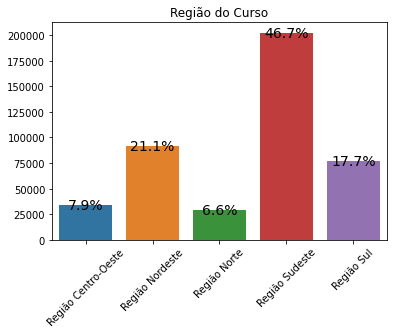

In [14]:
# Plotando variável Região do Curso
total = float(len(df_enade["CO_REGIAO_CURSO"]))
ax=sns.countplot(df_enade["CO_REGIAO_CURSO"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Região do Curso")
plt.ylabel("")
plt.xlabel("")
plt.show()

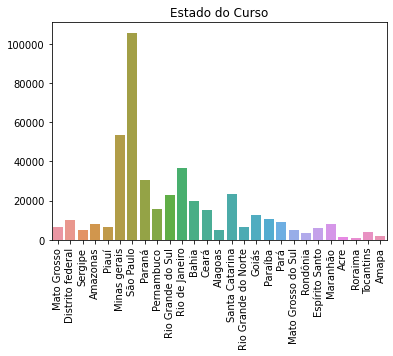

In [15]:
# Plotando variável Unidade da Federação do Curso
sns.countplot(df_enade["CO_UF_CURSO"])
plt.xticks(rotation=90)
plt.title("Estado do Curso")
plt.ylabel("")
plt.xlabel("")
plt.show()

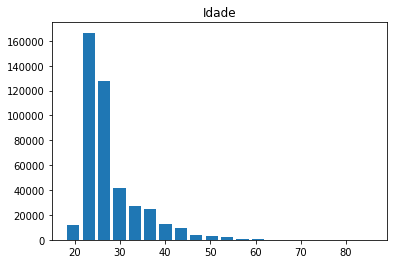

In [16]:
# Plotando a variável idade
plt.hist(df_enade["NU_IDADE"],bins=20,histtype="bar",rwidth=.8)
plt.title("Idade")
plt.show()

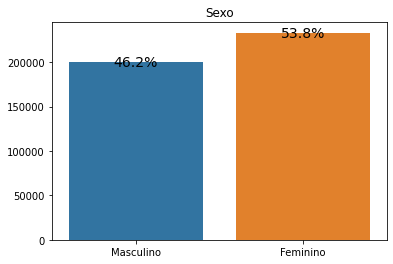

In [17]:
# Plotando a variável sexo
total = float(len(df_enade["TP_SEXO"]))
ax=sns.countplot(df_enade["TP_SEXO"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Sexo")
plt.ylabel("")
plt.xlabel("")
plt.show()

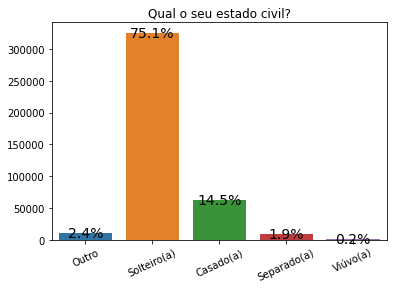

In [18]:
# Plotando a variável estado civil
total = float(len(df_enade["QE_I01"]))
ax=sns.countplot(df_enade["QE_I01"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual o seu estado civil?")
plt.ylabel("")
plt.xlabel("")
plt.show()

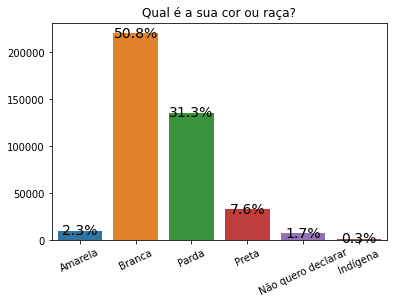

In [19]:
# Plotando a variável cor/raça
total = float(len(df_enade["QE_I02"]))
ax=sns.countplot(df_enade["QE_I02"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual é a sua cor ou raça?")
plt.ylabel("")
plt.xlabel("")
plt.show()


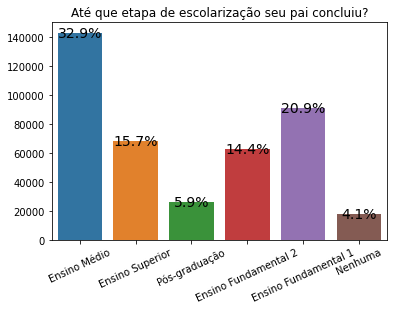

In [20]:
# Plotando a variável instrução do pai
total = float(len(df_enade["QE_I04"]))
ax=sns.countplot(df_enade["QE_I04"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Até que etapa de escolarização seu pai concluiu?")
plt.ylabel("")
plt.xlabel("")
plt.show()

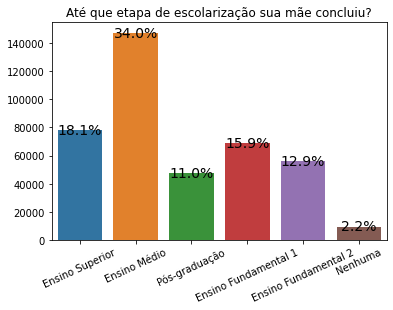

In [21]:
# Plotando a variável instrução da mãe
total = float(len(df_enade["QE_I05"]))
ax=sns.countplot(df_enade["QE_I05"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Até que etapa de escolarização sua mãe concluiu?")
plt.ylabel("")
plt.xlabel("")
plt.show()

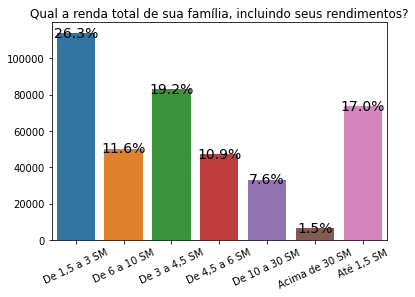

In [22]:
# Plotando a variável renda familiar
total = float(len(df_enade["QE_I08"]))
ax=sns.countplot(df_enade["QE_I08"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual a renda total de sua família, incluindo seus rendimentos?")
plt.ylabel("")
plt.xlabel("")
plt.show()

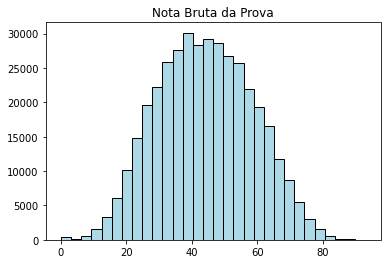

In [23]:
# Plotando a variável nota bruta
plt.hist(df_enade["NT_GER"],bins=30,edgecolor = "black",color="lightblue")
plt.title("Nota Bruta da Prova")
plt.show()

**CONCLUSÕES**

* A Região sudeste possui o maior número de participantes, já a região norte detém o menor número de participantes no ENADE.
* O número de participantes do Estado de São Paulo é muito superior que os demais. Notamos, também, um grande número de inscrições nos estados do Rio de Janeiro e os da região sul (RS,SC e PR).
* A média de idade é 27 anos, com a mínima 18 e máxima 86 anos. Ademais, 53.8% dos participantes são do sexo feminino e 46.2% são do sexo masculinos. 
* Quando observamos a variável estado civil, notamos que 75% dos participantes são solteiros.
* Metade dos participantes são autodeclarados brancos (50.8%), e apenas 0.3% são autodeclarados indígenas.
* De modo geral, o percentual de mães e pais com ensino superior e ensino médio são equivalentes. No entanto, o percentual de mães com pós-graduação é de 11%, contra 5.9% dos pais com esse mesma grau de instrução.
* Quase a metade dos participantes tem renda familiar total de até 3 salários mínimos.
* Os participantes em média obtiveram 44 pontos de nota bruta da prova.

### 2.2 RELACIONANDO NOTA COM DEMAIS VARIÁVEIS

In [24]:
# Estabelendo parâmetros outliers e mean
flierprops = dict(marker='o', markerfacecolor='grey', markersize=8,
                  linestyle='none')
meanprops = dict(marker='o', markerfacecolor='white', markersize=12,
                 markeredgecolor='red')

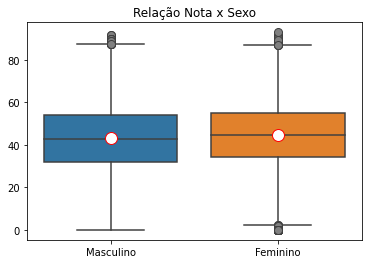

In [25]:
# Plotando relação entre nota x sexo
sns.boxplot(y="NT_GER",x="TP_SEXO",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Sexo")
plt.ylabel("")
plt.xlabel("")
plt.show()

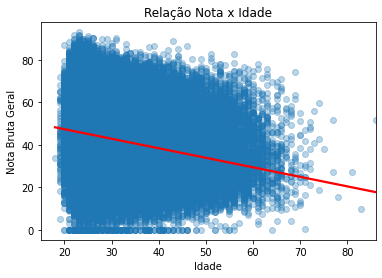

In [26]:
# Plotando relação entre nota x idade
sns.regplot(y="NT_GER", x="NU_IDADE", data=df_enade,line_kws={"color": "red"},scatter_kws={'alpha':0.3})
plt.title("Relação Nota x Idade")
plt.xlabel("Idade")
plt.ylabel("Nota Bruta Geral")
plt.xlim(15)
plt.show()

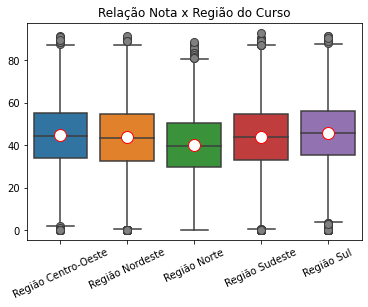

In [27]:
# Plotando relação entre nota x região do curso
sns.boxplot(y="NT_GER",x="CO_REGIAO_CURSO",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Região do Curso")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

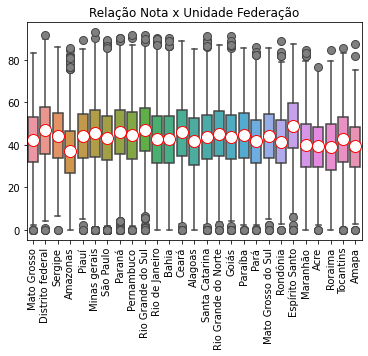

In [28]:
# Plotando relação entre nota x UF de funcionamento do curso
sns.boxplot(y="NT_GER",x="CO_UF_CURSO",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Unidade Federação")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.show()

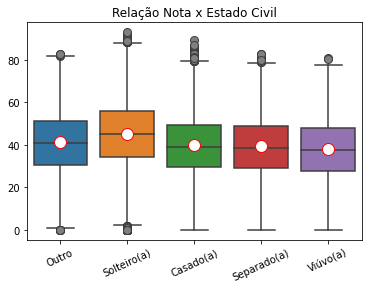

In [29]:
# Plotando relação entre nota x estado civil
sns.boxplot(y="NT_GER",x="QE_I01",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Estado Civil")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

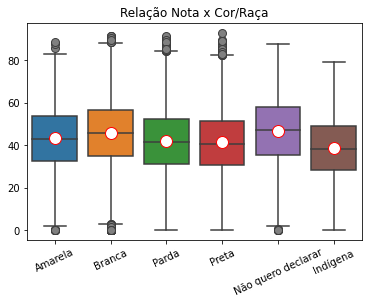

In [30]:
# Plotando relação entre nota x cor/raça
sns.boxplot(y="NT_GER",x="QE_I02",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Cor/Raça")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

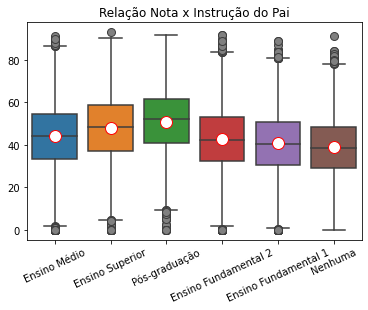

In [31]:
# Plotando relação entre nota x instrução do pai
sns.boxplot(y="NT_GER",x="QE_I04",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Instrução do Pai")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

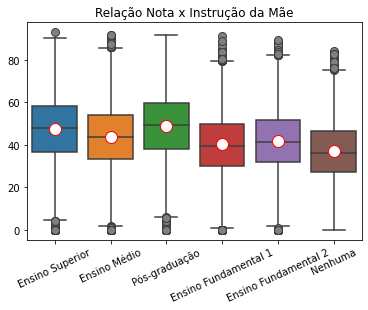

In [32]:
# Plotando relação entre nota x instrução da mãe
sns.boxplot(y="NT_GER",x="QE_I05",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Instrução da Mãe")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

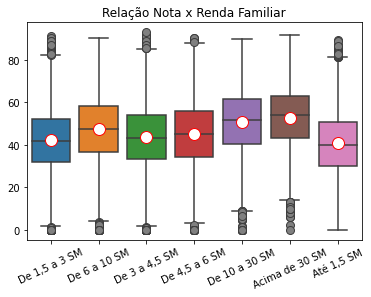

In [33]:
# Plotando relação entre nota x renda familiar
sns.boxplot(y="NT_GER",x="QE_I08",data=df_enade,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Renda Familiar")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

**CONCLUSÕES**

* A nota média das mulheres é 44.6, já a dos homens é de 43.3 pontos.
* Há uma correlação negativa entre idade e nota bruta. Deste modo, quanto maior a idade do participante, menor sua nota em média. Por exemplo, a média das notas aos 20 anos é 46.4, já aos 50 anos é 36.8 pontos.
* Em média, os participantes da região sul obtiveram as maiores notas, com 45.7 pontos. No entanto, o estado do Espírito Santo possui a maior média, com 48.8 pontos.
* O perfil geral dos participantes com as maiores notas é o seguinte: solteiro, autodeclarados brancos, os pais possuem pós-graduação e renda familiar alta.

Diego Ramirez <br>
daarfarias@hotmail.com<br>
https://github.com/daarfarias